In [4]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import brown
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [32]:
def preprocess(sentence):
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence = stemmer.stem(sentence)
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    filtered_words = [c for c in filtered_words if not c.isdigit()]
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)

In [33]:
url="bbc-text.csv"
dataset = pd.read_csv(url)
dataset = dataset[dataset.category == 'sport']
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]
print(dataset.head())
print(len(dataset))

  category                                               text
0    sport  tigers wary of farrell  gamble  leicester say ...
1    sport  yeading face newcastle in fa cup premiership s...
2    sport  henman hopes ended in dubai third seed tim hen...
3    sport  wilkinson fit to face edinburgh england captai...
4    sport  moya emotional after davis cup win carlos moya...
30


In [34]:
curpus = dataset['text']
print(curpus)

0     tigers wary of farrell  gamble  leicester say ...
1     yeading face newcastle in fa cup premiership s...
2     henman hopes ended in dubai third seed tim hen...
3     wilkinson fit to face edinburgh england captai...
4     moya emotional after davis cup win carlos moya...
5     connors boost for british tennis former world ...
6     bates seals takeover ken bates has completed h...
7     cole faces lengthy injury lay-off aston villa ...
8     moya fights back for indian title carlos moya ...
9     federer claims dubai crown world number one ro...
10    disappointed scott in solid start allan scott ...
11    lewsey puzzle over disallowed try england s jo...
12    rovers reject third ferguson bid blackburn hav...
13    henson stakes early lions claim the six nation...
14    scotland v italy (sat) murrayfield  edinburgh ...
15    robinson wants dual code success england rugby...
16    hingis to make unexpected return martina hingi...
17    funding cut hits wales students the wales 

In [35]:
tokenized_corpus = []
stemmer = PorterStemmer()
for i in range(len(corpus)):
    sentence = preprocess(corpus[i])
    tokenized_corpus.append(word_tokenize((sentence)))
print(tokenized_corpus)

[['tigers', 'wary', 'farrell', 'gamble', 'leicester', 'say', 'rushed', 'making', 'bid', 'andy', 'farrell', 'great', 'britain', 'rugby', 'league', 'captain', 'decide', 'switch', 'codes', 'anybody', 'else', 'involved', 'process', 'still', 'way', 'away', 'going', 'next', 'stage', 'tigers', 'boss', 'john', 'wells', 'told', 'bbc', 'radio', 'leicester', 'moment', 'still', 'lot', 'unknowns', 'andy', 'farrell', 'least', 'medical', 'situation', 'whoever', 'take', 'going', 'take', 'big', 'big', 'gamble', 'farrell', 'persistent', 'knee', 'problems', 'operation', 'knee', 'five', 'weeks', 'ago', 'expected', 'another', 'three', 'months', 'leicester', 'saracens', 'believed', 'head', 'list', 'rugby', 'union', 'clubs', 'interested', 'signing', 'farrell', 'decides', 'move', '15', 'man', 'game', 'move', 'across', 'union', 'wells', 'believes', 'would', 'better', 'playing', 'backs', 'least', 'initially', 'sure', 'could', 'make', 'step', 'league', 'union', 'involved', 'centre', 'said', 'wells', 'think', 'en

In [36]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)
print(vocabulary)

['tigers', 'wary', 'farrell', 'gamble', 'leicester', 'say', 'rushed', 'making', 'bid', 'andy', 'great', 'britain', 'rugby', 'league', 'captain', 'decide', 'switch', 'codes', 'anybody', 'else', 'involved', 'process', 'still', 'way', 'away', 'going', 'next', 'stage', 'boss', 'john', 'wells', 'told', 'bbc', 'radio', 'moment', 'lot', 'unknowns', 'least', 'medical', 'situation', 'whoever', 'take', 'big', 'persistent', 'knee', 'problems', 'operation', 'five', 'weeks', 'ago', 'expected', 'another', 'three', 'months', 'saracens', 'believed', 'head', 'list', 'union', 'clubs', 'interested', 'signing', 'decides', 'move', '15', 'man', 'game', 'across', 'believes', 'would', 'better', 'playing', 'backs', 'initially', 'sure', 'could', 'make', 'step', 'centre', 'said', 'think', 'england', 'prefer', 'progress', 'position', 'back', 'row', 'use', 'skills', 'within', 'forwards', 'jury', 'whether', 'cross', 'divide', 'club', 'balance', 'struck', 'cost', 'option', 'bringing', 'ready', 'made', 'replacement',

In [37]:
word2idx

{'tigers': 0,
 'wary': 1,
 'farrell': 2,
 'gamble': 3,
 'leicester': 4,
 'say': 5,
 'rushed': 6,
 'making': 7,
 'bid': 8,
 'andy': 9,
 'great': 10,
 'britain': 11,
 'rugby': 12,
 'league': 13,
 'captain': 14,
 'decide': 15,
 'switch': 16,
 'codes': 17,
 'anybody': 18,
 'else': 19,
 'involved': 20,
 'process': 21,
 'still': 22,
 'way': 23,
 'away': 24,
 'going': 25,
 'next': 26,
 'stage': 27,
 'boss': 28,
 'john': 29,
 'wells': 30,
 'told': 31,
 'bbc': 32,
 'radio': 33,
 'moment': 34,
 'lot': 35,
 'unknowns': 36,
 'least': 37,
 'medical': 38,
 'situation': 39,
 'whoever': 40,
 'take': 41,
 'big': 42,
 'persistent': 43,
 'knee': 44,
 'problems': 45,
 'operation': 46,
 'five': 47,
 'weeks': 48,
 'ago': 49,
 'expected': 50,
 'another': 51,
 'three': 52,
 'months': 53,
 'saracens': 54,
 'believed': 55,
 'head': 56,
 'list': 57,
 'union': 58,
 'clubs': 59,
 'interested': 60,
 'signing': 61,
 'decides': 62,
 'move': 63,
 '15': 64,
 'man': 65,
 'game': 66,
 'across': 67,
 'believes': 68,
 'wou

In [13]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array


In [18]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [22]:
import torch
import torch.functional as F
import torch.nn.functional as F
from torch.autograd import Variable
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.01

In [23]:
def homework(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('word does not exist on dataset')
    if (index_of_word >= 0):
        print('index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('task1 Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        aaa = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(np.array(aaa[j]),np.array(aaa[index_of_word]))/(((np.sum(aaa[j]**2))**0.5) * ((np.sum(aaa[index_of_word]**2))**0.5))
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(11):
            array_for_dot_cloud.append(np.array(aaa[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        #print(X_embedded)
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

index of the word sport  is  652
task1 Thensors of words
tensor([[-3.0636e-01, -1.4210e-03, -2.3338e-01,  8.6886e-01,  1.2847e+00],
        [ 1.1402e-02,  1.1671e+00, -1.2314e+00, -7.9058e-01, -6.5740e-01],
        [ 2.8918e-01, -7.6816e-01,  3.1885e-01,  1.0034e-01, -3.8099e-01],
        ...,
        [-8.2830e-01,  4.2179e-01, -5.8811e-01,  7.9795e-01,  6.5148e-01],
        [-2.5650e-01,  4.2628e-01,  3.2625e-01, -9.1730e-02,  1.3091e+00],
        [ 1.8002e-01, -1.8989e+00, -3.9428e-01, -3.6580e-01,  6.1451e-02]])
[1.0000000785214411, 652] sport
[0.9749331923478933, 339] intervened
[0.9689152838582695, 484] bit
[0.9535702961745642, 1794] upstairs
[0.940241541030487, 1342] bortolami
[0.9384868570547029, 1916] hong
[0.9351892365676432, 489] obsessed
[0.9332259626199644, 766] ensure
[0.9294537405022731, 420] international
[0.9260515693884978, 112] between
tensor([ 0.7843,  0.7554, -0.3927, -1.6503,  0.8521], grad_fn=<SelectBackward>) turning
[[ 0.33398134  0.77173525 -1.0021571  -1.55149

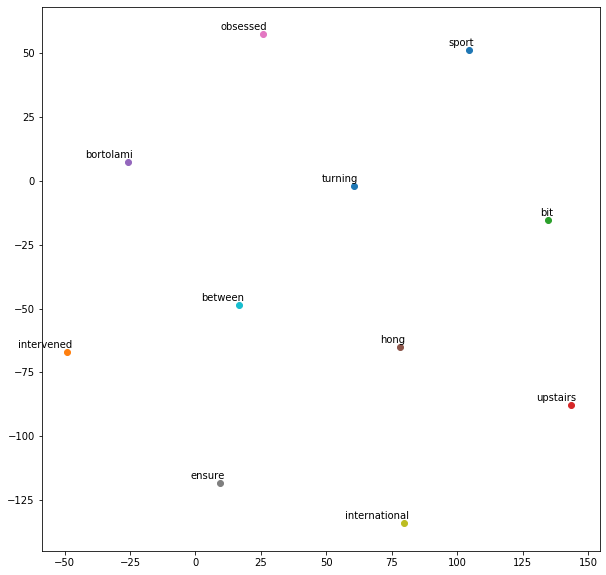

In [25]:
homework('sport')

In [26]:
url="bbc-text.csv"
dataset = pd.read_csv(url)
dataset = dataset[dataset.category == 'tech']
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]
print(dataset.head())
print(len(dataset))

  category                                               text
0     tech  tv future in the hands of viewers with home th...
1     tech  games maker fights for survival one of britain...
2     tech  security warning over  fbi virus  the us feder...
3     tech  halo 2 heralds traffic explosion the growing p...
4     tech  mobile audio enters new dimension as mobile ph...
30


In [29]:
def homework2(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('word does not exist on dataset')
    if (index_of_word >= 0):
        print('index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('task1 Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        aaa = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(np.array(aaa[j]),np.array(aaa[index_of_word]))/(((np.sum(aaa[j]**2))**0.5) * ((np.sum(aaa[index_of_word]**2))**0.5))
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(11):
            array_for_dot_cloud.append(np.array(aaa[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        #print(X_embedded)
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

index of the word american  is  514
task1 Thensors of words
tensor([[-3.0636e-01, -1.4210e-03, -2.3338e-01,  8.6886e-01,  1.2847e+00],
        [ 1.1402e-02,  1.1671e+00, -1.2314e+00, -7.9058e-01, -6.5740e-01],
        [ 2.8918e-01, -7.6816e-01,  3.1885e-01,  1.0034e-01, -3.8099e-01],
        ...,
        [-8.2830e-01,  4.2179e-01, -5.8811e-01,  7.9795e-01,  6.5148e-01],
        [-2.5650e-01,  4.2628e-01,  3.2625e-01, -9.1730e-02,  1.3091e+00],
        [ 1.8002e-01, -1.8989e+00, -3.9428e-01, -3.6580e-01,  6.1451e-02]])
[1.0000000000000002, 514] american
[0.9828276611828763, 999] 62secs
[0.956462657519579, 1824] evidence
[0.9523159882275617, 126] slough
[0.9497123303901137, 27] stage
[0.9414169261776583, 1227] pressure
[0.9400071047847235, 1611] understands
[0.9374784281705133, 1782] exciting
[0.9308466194914704, 1156] english
[0.9252122538393219, 415] 3
tensor([-0.3368,  2.8245,  1.1949,  0.6543, -0.3404], grad_fn=<SelectBackward>) denied
[[-2.73201615e-01  1.97951615e+00  6.33919418e-0

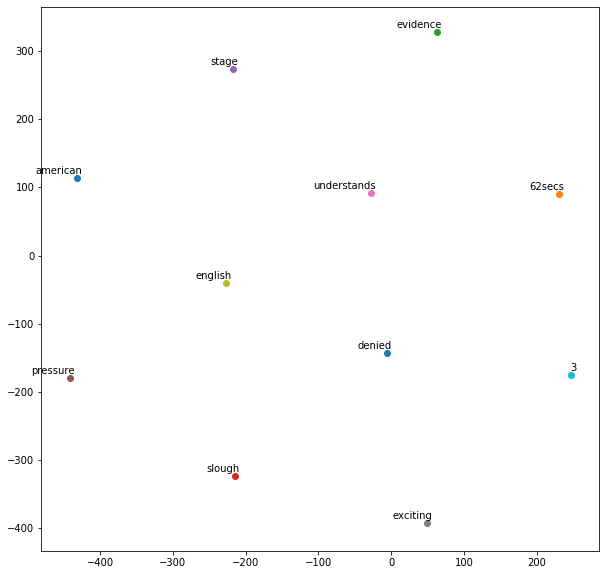

In [39]:
homework('american')